In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torchvision.models as models
from torchvision import transforms, datasets
#torch.cuda.is_available(), torch.cuda.current_device()

import sklearn
from sklearn import decomposition


import pandas as pd # process txt
from scipy.io import loadmat
from PIL import Image
from sklearn.svm import NuSVR # nu-SVR, implement from libsvm
from collections import defaultdict


## PCA of visual features

- 对于SVM，默认X为semantic embedding，Y为PCA处理后的结果（Exemplars）。
- 一开始只有train部分，学习到SVR后，对test的semantic embedding预测，得到test_exemplars。
- 之后采用1-NN 分类器，预测的标签为距离sample_exemplar结果最近的test_exemplar给出的标签

### Iris Data-set

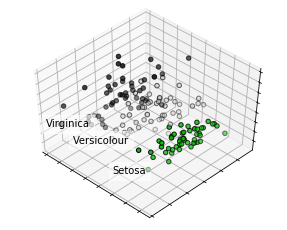

In [8]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## AwA2

In [2]:
folder = "G:/dataset/awa/"

cla = {}

with open(folder + "classes.txt", "r") as f:
    output = f.readlines()

for s in output: # index, label
    i, l = s.split()
    cla[i] = l

fp = folder + "predicates.txt"
dic = {}
with open(fp, "r") as f:
    output = f.readlines()
for s in output:
    i, att = s.split()
    dic[i] = att

In [4]:
print(cla)
print(dic)

{'1': 'antelope', '2': 'grizzly+bear', '3': 'killer+whale', '4': 'beaver', '5': 'dalmatian', '6': 'persian+cat', '7': 'horse', '8': 'german+shepherd', '9': 'blue+whale', '10': 'siamese+cat', '11': 'skunk', '12': 'mole', '13': 'tiger', '14': 'hippopotamus', '15': 'leopard', '16': 'moose', '17': 'spider+monkey', '18': 'humpback+whale', '19': 'elephant', '20': 'gorilla', '21': 'ox', '22': 'fox', '23': 'sheep', '24': 'seal', '25': 'chimpanzee', '26': 'hamster', '27': 'squirrel', '28': 'rhinoceros', '29': 'rabbit', '30': 'bat', '31': 'giraffe', '32': 'wolf', '33': 'chihuahua', '34': 'rat', '35': 'weasel', '36': 'otter', '37': 'buffalo', '38': 'zebra', '39': 'giant+panda', '40': 'deer', '41': 'bobcat', '42': 'pig', '43': 'lion', '44': 'mouse', '45': 'polar+bear', '46': 'collie', '47': 'walrus', '48': 'raccoon', '49': 'cow', '50': 'dolphin'}
{'1': 'black', '2': 'white', '3': 'blue', '4': 'brown', '5': 'gray', '6': 'orange', '7': 'red', '8': 'yellow', '9': 'patches', '10': 'spots', '11': 'stri

In [5]:
fp = folder + "predicate-matrix-binary.txt"
#matb = pd.read_csv(fp, sep=" ", encoding='utf-8')
matb = np.loadtxt(fp, delimiter=" ", encoding='utf-8')

In [6]:
matb.shape, type(matb), matb[0].shape

((50, 85), numpy.ndarray, (85,))

In [3]:
fs = folder + "ResNet101/AwA2-labels.txt"
y = np.loadtxt(fs, delimiter=" ", encoding='utf-8')
print(y.shape)

(37322,)

In [16]:
fs = folder + "ResNet101/AwA2-features.txt"
#f = pd.read_csv(fs, sep=" ")
x = np.loadtxt(fs, delimiter=" ", encoding='utf-8')
print(x.shape, type(x))
pca = decomposition.PCA(n_components=1024)
pca.fit(x)
X = pca.transform(x) # 20s
print(X.shape)

## CUB

In [2]:
# awk '$2==1' train_test_split.txt | wc -l 5994 training set
# awk '$2==0' train_test_split.txt | wc -l 5794 test set 

In [2]:
folder = "G:/dataset/cub/CUB_200_2011/"

ttp = folder + "train_test_split.txt"
imgs = folder + "images.txt"
cla = folder + "image_class_labels.txt"

pcattr = folder + "attributes/class_attribute_labels_continuous.txt"
attrs = np.loadtxt(pcattr, delimiter=" ", encoding='utf-8')
print(attrs.shape)

tpt = pd.read_csv(ttp, usecols=[1], sep=" ", names=['train'])
imgt = pd.read_csv(imgs, usecols=[1], sep=" ", names=['path'])
clat = pd.read_csv(cla, usecols=[1], sep=" ", names=['label'])
t1 = pd.merge(imgt, clat, left_index=True, right_index=True, how='outer')
t2 = pd.merge(t1, tpt, left_index=True, right_index=True, how='outer')
t2 

(200, 312)


,path,label,train
0,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0
1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1
2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0
3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1
4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1
...,...,...,...
11783,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1
11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0
11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0
11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1


In [60]:
data_transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

cub_dataset = datasets.ImageFolder(root=folder + 'images', transform=data_transform)
data_loader = torch.utils.data.DataLoader(cub_dataset, batch_size=7, shuffle=False)
#np.savetxt("CUB-filenames.txt", np.array(cub_dataset.imgs)[:,0], fmt='%s', encoding='utf-8')
#np.savetxt("CUB-labels.txt", np.array(cub_dataset.imgs)[:,1].astype('int32'), fmt='%s', encoding='utf-8') # Problem

In [55]:
# 改进了 Crop技术，原本的RandomResizedCrop 容易丢失整体
crop_transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip()])
crop_dataset = datasets.ImageFolder(root=folder + 'images', transform=crop_transform)
crop_loader = torch.utils.data.DataLoader(crop_dataset, batch_size=1, shuffle=False)

In [58]:
# np.array(crop_dataset.imgs)[:,0][:3] 参考前三张
fig = plt.figure()
cnt = 0
for x, y in crop_dataset:
    #plt.imshow(np.array(x))
    if cnt % 1000 == 0:
        print(cnt)
    cnt = cnt + 1
    #plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


<Figure size 432x288 with 0 Axes>

In [61]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# CUDA speedup maybe
class Net(torch.nn.Module):
    def __init__(self , model):
        super(Net, self).__init__()
        #取掉model的后两层
        self.resnet_layer = torch.nn.Sequential(*list(model.children())[:-1])
        
    def forward(self, x):
        x = self.resnet_layer(x)
        return x

#resNet = models.resnet101(pretrained=True)
resNet = models.resnet101()
resModel = Net(resNet)
#torch.save(model.state_dict(), "pretrained_resnet_101_2048.pth")
resModel.load_state_dict(torch.load("pretrained_resnet_101_2048.pth"))
resModel.eval()
resModel.to(device)
# single test
#cub_img = resModel(torch.unsqueeze(cub_dataset[1][0], 0))
#cub_dataset[1][0].shape
#cub_img = cub_img.detach().numpy()
#cub_img.reshape(-1).shape
# CPU 大概1s处理一个
#
# 3.2h
# GPU
# 2 * 2 * 7 * 421
print("verbose of model")

verbose of model


In [63]:
features = np.zeros((11788, 2048))
# o1.reshape(7, 2048)
#np.concatenate(features, o1.reshape(7, 2048))
features[:7,:].shape

(7, 2048)

In [64]:
features = np.zeros((11788, 2048))
cnt = 0
for inputs, labels in data_loader:
    #if cnt == 1:
    #    break
    inputs = inputs.to(device)
    output = resModel(inputs)
    features[cnt*7:(cnt+1)*7,:] = output.cpu().detach().numpy().reshape(7, 2048)
    #print(output.cpu().detach().numpy().shape)
    cnt = cnt + 1
    if cnt % 100 == 0:
        print("batch{}".format(cnt))

batch100
batch200
batch300
batch400
batch500
batch600
batch700
batch800
batch900
batch1000
batch1100
batch1200
batch1300
batch1400
batch1500
batch1600


In [67]:
#features
np.savetxt("cub-features.txt", features, encoding='utf-8')

## SUN

In [3]:
folder = "G:/dataset/sun/"

im = loadmat(folder + "SUNAttributeDB/images.mat")
attr = loadmat(folder + "SUNAttributeDB/attributes.mat")
attrs = loadmat(folder + "SUNAttributeDB/attributeLabels_continuous.mat" )

#sun_dataset = datasets.ImageFolder(root=folder + 'images', transform=data_transform)

In [10]:
attrs['labels_cv'].shape, attr['attributes'].shape, im['images'].shape

((14340, 102), (102, 1), (14340, 1))

In [25]:
"_".join(im['images'][12600][0][0].split("/")[1:3])

'theater_indoor_round'

In [72]:
class SunDataset(torch.utils.data.Dataset):
    """SUN Attribute Dataset for preprocessing"""
    def __init__(self, path, transform=None):
        """
        Args:
            path: scipy.io.loadmat path + SUNAttributeDB/images.mat
            transform: Optional transform to be applied on a sample
        """
        self.folder = path
        self.im = loadmat(path + "SUNAttributeDB/images.mat")
        self.transform = transform
    def __len__(self):
        return len(self.im['images'])
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = self.folder + "images/"+ im['images'][idx][0][0]
        sample = Image.open(img_name).convert('RGB')
        if self.transform:
            sample = self.transform(sample)
        return sample

In [73]:
data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
sun_dataset = SunDataset(path = folder, transform = data_transform)
crop_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip()])
crop_dataset = SunDataset(path = folder, transform = crop_transform)

C:\Users\qq704\AppData\Roaming\Python\Python37\site-packages\torchvision\transforms\transforms.py:703: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


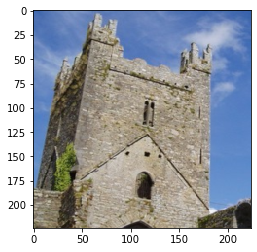

In [74]:
# Effects of Crop
fig = plt.figure()
for i in range(len(crop_dataset)):
    if i == 1:
        break
    i = i + 1
    plt.imshow(crop_dataset[i])
    plt.show()

In [75]:
sun_loader = torch.utils.data.DataLoader(sun_dataset, batch_size=5, shuffle=False)

In [ ]:
# Test
cnt = 0
for inputs in sun_loader:
    cnt = cnt + 1
    if cnt % 239 == 0:
        print("batch{}".format(cnt))

In [65]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# CUDA speedup maybe
class Net(torch.nn.Module):
    def __init__(self , model):
        super(Net, self).__init__()
        #取掉model的后两层
        self.resnet_layer = torch.nn.Sequential(*list(model.children())[:-1])
        
    def forward(self, x):
        x = self.resnet_layer(x)
        return x

#resNet = models.resnet101(pretrained=True)
resNet = models.resnet101()
resModel = Net(resNet)
#torch.save(model.state_dict(), "pretrained_resnet_101_2048.pth")
resModel.load_state_dict(torch.load("pretrained_resnet_101_2048.pth"))
resModel.eval()
resModel.to(device)
# single test
#cub_img = resModel(torch.unsqueeze(cub_dataset[1][0], 0))
#cub_dataset[1][0].shape
#cub_img = cub_img.detach().numpy()
#cub_img.reshape(-1).shape
print("verbose of model")

verbose of model


In [77]:
features = np.zeros((14340, 2048))
cnt = 0
for inputs in sun_loader:
    #if cnt == 1:
    #    break
    inputs = inputs.to(device)
    output = resModel(inputs)
    features[cnt*5:(cnt+1)*5,:] = output.cpu().detach().numpy().reshape(5, 2048)
    #print(output.cpu().detach().numpy().shape)
    cnt = cnt + 1
    if cnt % 239 == 0:
        print("batch{}".format(cnt))

batch239
batch478
batch717
batch956
batch1195
batch1434
batch1673
batch1912
batch2151
batch2390
batch2629
batch2868


In [80]:
#features
np.savetxt("sun-features.txt", features, encoding='utf-8')

In [ ]:
#data_loader = torch.utils.data.DataLoader(sun_dataset, batch_size=7, shuffle=False)
#np.savetxt("CUB-filenames.txt", np.array(sun_dataset.imgs)[:,0], fmt='%s', encoding='utf-8')
#np.savetxt("CUB-labels.txt", np.array(sun_dataset.imgs)[:,1].astype('int32')) # Problem

In [28]:
ltoidx = {}
cnt = 0
for i, j in enumerate(im['images']):
    p = j[0][0].split("/")
    l = p[1] if len(p) == 3 else "_".join(p[1:3])
    # else if len(p) == 4
    if l not in ltoidx:
        ltoidx[l] = cnt
        cnt = cnt + 1 
        
sun_label = []
for j in im['images']:
    p = j[0][0].split("/")
    l = p[1] if len(p) == 3 else "_".join(p[1:3])
    sun_label.append(ltoidx[l])

np.savetxt("sun-labels.txt", np.array(sun_label), fmt='%s', encoding='utf-8')

In [31]:
sun_label[-1]

716

In [40]:
attrs['labels_cv'].shape, np.array(sun_label).shape

((14340, 102), (14340,))

In [41]:
semat_group = defaultdict(list)
for c in range(717):
    semat_group[c] = []

for y, row in zip(np.array(sun_label), attrs['labels_cv']):
    semat_group[y].append(row)

# Average
# np.mean(attrs['labels_cv'][:20], axis=0).shape
se_matrix = np.zeros((717, 102))
k = 0

for item in semat_group.items():
    y, ary = item
    se_matrix[y,:] = np.mean(ary, axis=0) # Key Sentence



In [49]:
np.savetxt("sun-se-matrix.txt", se_matrix, encoding='utf-8')

In [44]:
im['images'][1][0][0], attr['attributes'][1][0][0]

('a/abbey/sun_aaoktempcmudsvna.jpg', 'driving')

In [46]:
# images, 14340, attr, 102

### PyTorch ResNet-101

提取特征，论文中ResNet-101最后一层输出2048维（如AwA2所示）

[torch改造模型参考](https://blog.csdn.net/whut_ldz/article/details/78874977)
[feature_extraction](https://discuss.pytorch.org/t/resnet-101-for-feature-extraction-gives-confused-result/20077)
[image_folder](https://blog.csdn.net/TH_NUM/article/details/80877435)

In [33]:
class Net(torch.nn.Module):
    def __init__(self , model):
        super(Net, self).__init__()
        #取掉model的后两层
        self.resnet_layer = torch.nn.Sequential(*list(model.children())[:-1])
        
    def forward(self, x):
        x = self.resnet_layer(x)
        return x

#resNet = models.resnet101(pretrained=True)
resNet = models.resnet101()
model = Net(resNet)
#torch.save(model.state_dict(), "pretrained_resnet_101_2048.pth")
model.load_state_dict(torch.load("pretrained_resnet_101_2048.pth"))
model.eval()
cub_img = model(torch.unsqueeze(cub_dataset[1][0], 0))

In [37]:
cub_img = cub_img.detach().numpy()
cub_img.reshape(-1).shape